# Machine Translation for Writing Styles

In [1]:
from utils import * 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk

In [40]:
DATAPASS = '../../yelp10/dataset/review.json'
review = load_json_to_df(DATAPASS)

In [4]:
review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA
2,uYHaNptLzDLoV_JZ_MuzUA,0,2015-09-17,0,ne5WhI1jUFOcRn-b-gAzHA,3,Mittlerweile gibt es in Edinburgh zwei Ableger...,0,AXgRULmWcME7J6Ix3I--ww
3,uYHaNptLzDLoV_JZ_MuzUA,0,2016-08-21,0,llmdwOgDReucVoWEry61Lw,4,Location is everything and this hotel has it! ...,0,oU2SSOmsp_A8JYI7Z2JJ5w
4,uYHaNptLzDLoV_JZ_MuzUA,0,2013-11-20,0,DuffS87NaSMDmIfluvT83g,5,gute lage im stadtzentrum. shoppingmeile und s...,0,0xtbPEna2Kei11vsU-U2Mw


In [9]:
user_group = review.groupby('user_id').count().sort_values(by ='review_id', ascending = False).reset_index()

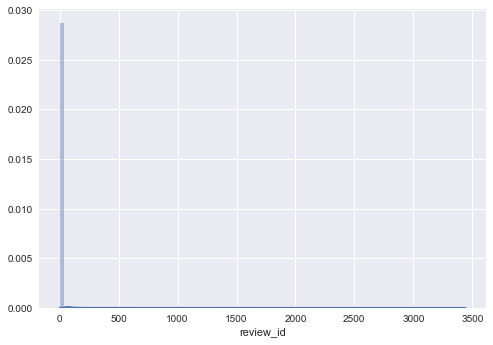

In [14]:
sns.distplot(user_group['review_id'], bins = 100)
plt.show()

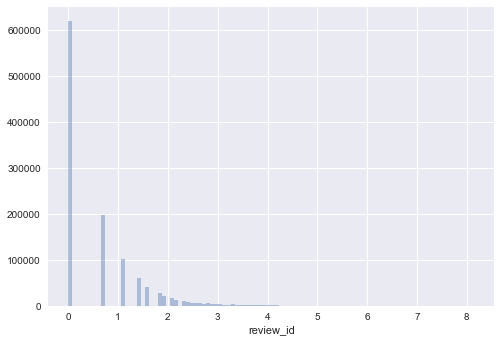

In [20]:
sns.distplot(np.log(user_group['review_id']), bins = 100, kde = False)
plt.show()

#### Top 10 Writers

In [24]:
user_group.head(10)

,user_id,business_id,cool,date,funny,review_id,stars,text,useful
0,CxDOIDnH8gp9KXzpBHJYXw,3442,3442,3442,3442,3442,3442,3442,3442
1,bLbSNkLggFnqwNNzzq-Ijw,1952,1952,1952,1952,1952,1952,1952,1952
2,PKEzKWv_FktMm2mGPjwd0Q,1563,1563,1563,1563,1563,1563,1563,1563
3,DK57YibC5ShBmqQl97CKog,1381,1381,1381,1381,1381,1381,1381,1381
4,QJI9OSEn6ujRCtrX06vs1w,1318,1318,1318,1318,1318,1318,1318,1318
5,d_TBs6J3twMy9GChqUEXkg,1160,1160,1160,1160,1160,1160,1160,1160
6,ELcQDlf69kb-ihJfxZyL0A,1123,1123,1123,1123,1123,1123,1123,1123
7,UYcmGbelzRa0Q6JqzLoguw,1080,1080,1080,1080,1080,1080,1080,1080
8,U4INQZOPSUaj8hMjLlZ3KA,1067,1067,1067,1067,1067,1067,1067,1067
9,cMEtAiW60I5wE_vLfTxoJQ,1064,1064,1064,1064,1064,1064,1064,1064


In [26]:
user_group = user_group[['user_id', 'review_id']]

In [30]:
DATAPASS2 = '../../yelp10/dataset/user.json'
user = load_json_to_df(DATAPASS2)

In [32]:
top10 = user_group.head(10)
user10 = user.loc[user['user_id'].isin(top10['user_id'])]

In [42]:
# merge user and review counts
# select 2nd and 4th person as training targets
# because their user status were similar
target = pd.merge(top10, user10, on = 'user_id').iloc[2:4]

In [43]:
target_review = review.loc[review['user_id'].isin(target['user_id'])]

In [1]:
# save in csv
target_review.to_csv('sample_user_review.csv', index = False)
target.to_csv('sample_user_profile.csv', index = False)

NameError: name 'target_review' is not defined

In [2]:
# load csv
target_review = pd.read_csv('sample_user_review.csv')
target_profile = pd.read_csv('sample_user_profile.csv')

## What kind of metric can we use to define 'writing style' ?

In [3]:
user1 = target_review[target_review['user_id'] == target_profile.iloc[0]['user_id']]

In [4]:
user2 = target_review[target_review['user_id'] == target_profile.iloc[1]['user_id']]

### Rating

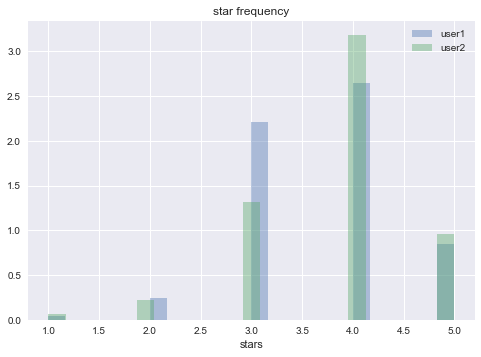

In [5]:
sns.distplot(user1['stars'], kde = False, norm_hist = True)
sns.distplot(user2['stars'], kde = False, norm_hist = True)
plt.title('star frequency')
plt.legend(['user1', 'user2'])
plt.show()

### Length

In [6]:
def word_length(s):
    return len(nltk.word_tokenize(s))

def sentence_length(s):
    return len(nltk.sent_tokenize(s))

In [7]:
user1_len = user1['text'].apply(lambda x : word_length(x))

In [8]:
user2_len = user2['text'].apply(lambda x : word_length(x))

In [9]:
user1_len2 = user1['text'].apply(lambda x : sentence_length(x))

In [10]:
user2_len2 = user2['text'].apply(lambda x : sentence_length(x))

#### Word length

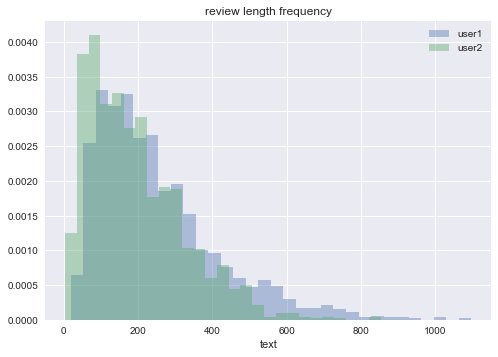

In [11]:
sns.distplot(user1_len, kde = False, norm_hist= True)
sns.distplot(user2_len, kde = False, norm_hist= True)
plt.title('review length frequency')
plt.legend(['user1', 'user2'])
plt.show()

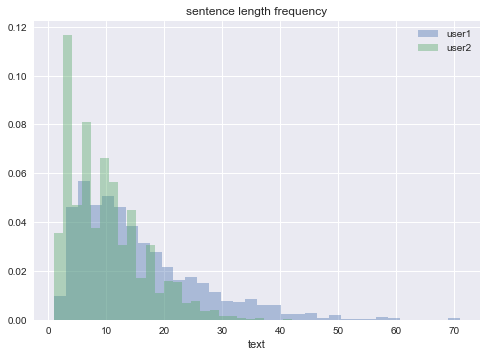

In [12]:
sns.distplot(user1_len2, kde = False, norm_hist= True)
sns.distplot(user2_len2, kde = False, norm_hist= True)
plt.title('sentence length frequency')
plt.legend(['user1', 'user2'])
plt.show()

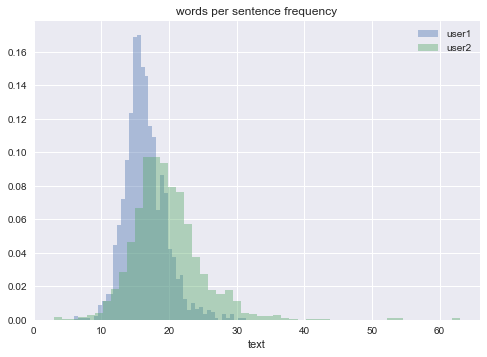

In [13]:
sns.distplot(user1_len/user1_len2, kde = False, norm_hist= True)
sns.distplot(user2_len/user2_len2, kde = False, norm_hist= True)
plt.title('words per sentence frequency')
plt.legend(['user1', 'user2'])
plt.show()

### Types

In [14]:
def extract_word_type(s):
    tagged = nltk.pos_tag(nltk.word_tokenize(s))
    proverb = len([item[0] for item in tagged if item[1][0] == 'P'])
    noun = len([item[0] for item in tagged if item[1][0] == 'N'])
    verb = len([item[0] for item in tagged if item[1][0] == 'V'])
    adjective = len([item[0] for item in tagged if item[1][0] == 'J'])
    return proverb, noun, verb, adjective

In [15]:
w_type1 = user1['text'].apply(lambda x : extract_word_type(x))

In [16]:
w_type2 = user2['text'].apply(lambda x : extract_word_type(x))

#### Pronouns

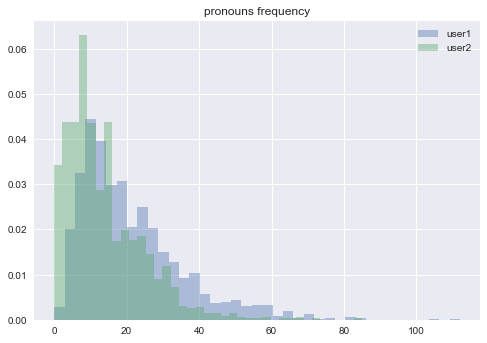

In [17]:
sns.distplot([i[0] for i in w_type1], kde = False, norm_hist= True)
sns.distplot([j[0] for j in w_type2], kde = False, norm_hist= True)
plt.title('pronouns frequency')
plt.legend(['user1', 'user2'])
plt.show()

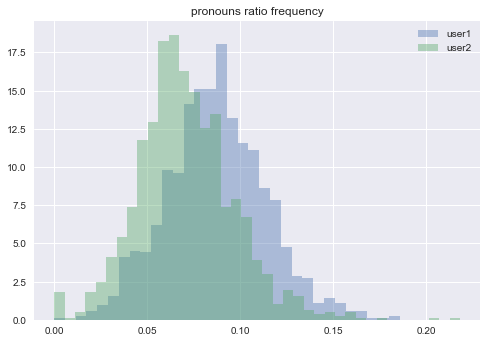

In [51]:
sns.distplot([i[0]/l for i,l in zip(w_type1, user1_len)], kde = False, norm_hist= True)
sns.distplot([j[0]/l for j,l in zip(w_type2, user2_len)], kde = False, norm_hist= True)
plt.title('pronouns ratio frequency')
plt.legend(['user1', 'user2'])
plt.savefig('pronouns_ratio.png')
plt.show()

#### Nouns

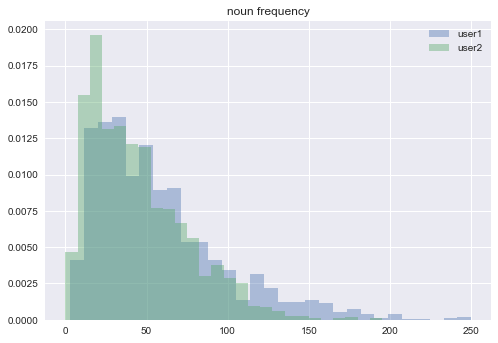

In [19]:
sns.distplot([i[1] for i in w_type1], kde = False, norm_hist= True)
sns.distplot([j[1] for j in w_type2], kde = False, norm_hist= True)
plt.title('noun frequency')
plt.legend(['user1', 'user2'])
plt.show()

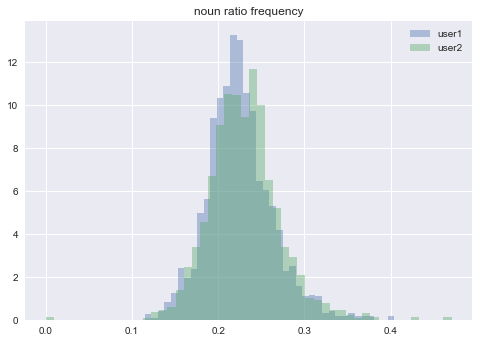

In [20]:
sns.distplot([i[1]/l for i,l in zip(w_type1, user1_len)], kde = False, norm_hist= True)
sns.distplot([j[1]/l for j,l in zip(w_type2, user2_len)], kde = False, norm_hist= True)
plt.title('noun ratio frequency')
plt.legend(['user1', 'user2'])
plt.show()

#### Verbs

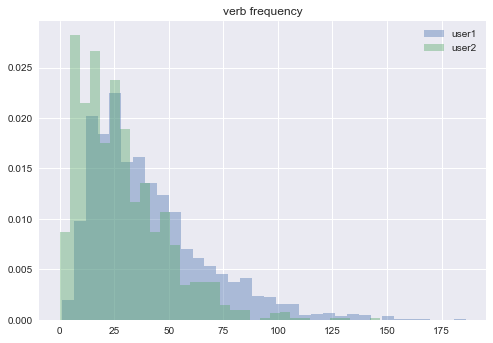

In [21]:
sns.distplot([i[2] for i in w_type1], kde = False, norm_hist= True)
sns.distplot([j[2] for j in w_type2], kde = False, norm_hist= True)
plt.title('verb frequency')
plt.legend(['user1', 'user2'])
plt.show()

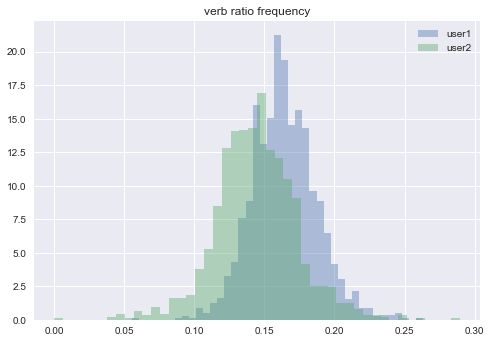

In [22]:
sns.distplot([i[2]/l for i,l in zip(w_type1, user1_len)], kde = False, norm_hist= True)
sns.distplot([j[2]/l for j,l in zip(w_type2, user2_len)], kde = False, norm_hist= True)
plt.title('verb ratio frequency')
plt.legend(['user1', 'user2'])
plt.show()

#### Adjective

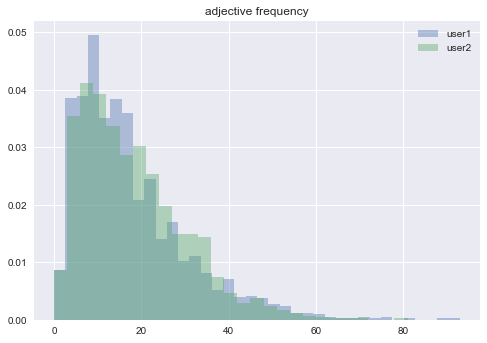

In [23]:
sns.distplot([i[3] for i in w_type1], kde = False, norm_hist= True)
sns.distplot([j[3] for j in w_type2], kde = False, norm_hist= True)
plt.title('adjective frequency')
plt.legend(['user1', 'user2'])
plt.show()

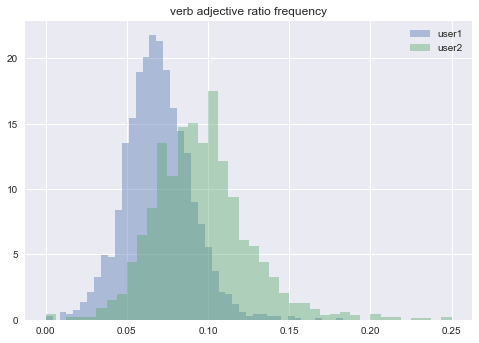

In [52]:
sns.distplot([i[3]/l for i,l in zip(w_type1, user1_len)], kde = False, norm_hist= True)
sns.distplot([j[3]/l for j,l in zip(w_type2, user2_len)], kde = False, norm_hist= True)
plt.title('verb adjective ratio frequency')
plt.legend(['user1', 'user2'])
plt.savefig('verb_adj_ratio.png')
plt.show()

User1 uses more verbs and nouns, while user2 uses more adjectives.

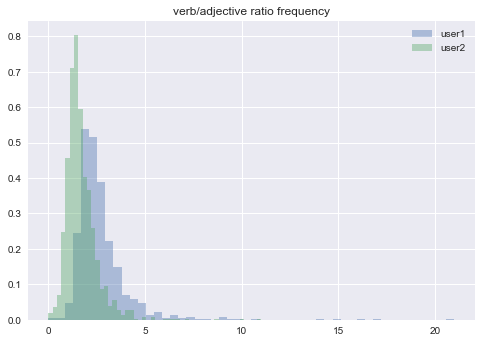

In [25]:
sns.distplot([0 if i[3] == 0 else i[2]/i[3] for i in w_type1], kde = False, norm_hist = True)
sns.distplot([0 if j[3] == 0 else j[2]/j[3] for j in w_type2], kde = False, norm_hist = True)
plt.title('verb/adjective ratio frequency')
plt.legend(['user1', 'user2'])
plt.show()

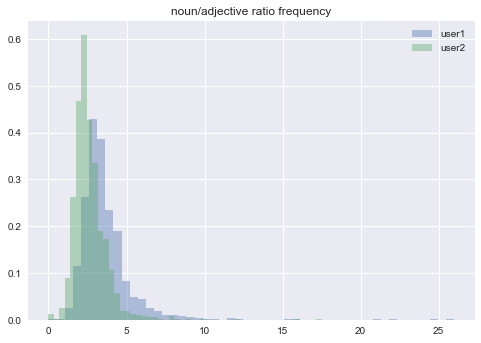

In [26]:
sns.distplot([0 if i[3] == 0 else i[1]/i[3] for i in w_type1], kde = False, norm_hist = True)
sns.distplot([0 if j[3] == 0 else j[1]/j[3] for j in w_type2], kde = False, norm_hist = True)
plt.title('noun/adjective ratio frequency')
plt.legend(['user1', 'user2'])
plt.show()

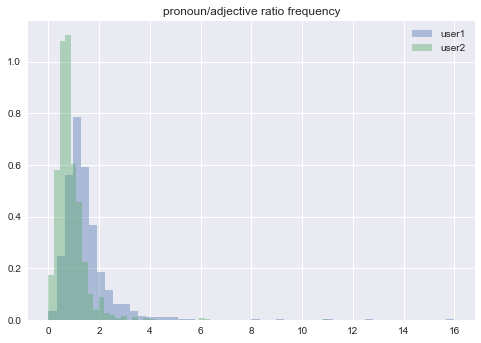

In [27]:
sns.distplot([0 if i[3] == 0 else i[0]/i[3] for i in w_type1], kde = False, norm_hist = True)
sns.distplot([0 if j[3] == 0 else j[0]/j[3] for j in w_type2], kde = False, norm_hist = True)
plt.title('pronoun/adjective ratio frequency')
plt.legend(['user1', 'user2'])
plt.show()

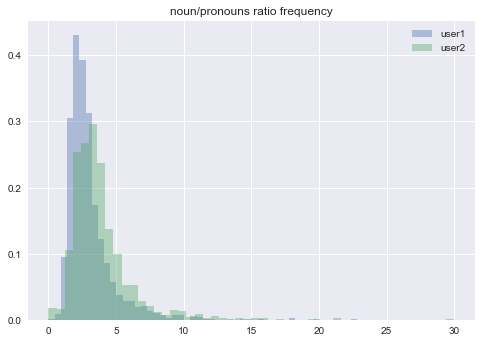

In [28]:
sns.distplot([0 if i[0] == 0 else i[1]/i[0] for i in w_type1], kde = False, norm_hist = True)
sns.distplot([0 if j[0] == 0 else j[1]/j[0] for j in w_type2], kde = False, norm_hist = True)
plt.title('noun/pronouns ratio frequency')
plt.legend(['user1', 'user2'])
plt.show()

In [29]:
user1['text'][:10]

0     This is one of those great Las Vegas places fo...
2     I like the Bellagio Gallery of Fine Arts, enou...
3     I had White Castle once before in when I was v...
4     I tried Settebello for the first time last nig...
5     We went last night to see Ain't Misbehavin'.  ...
7     I have been to the gallery several times since...
9     The last part of my playing tourist yesterday ...
10    I went here last night to try the place out.  ...
11    I stopped here for breakfast yesterday and it ...
13    I've been to Mint 8 times about half the time ...
Name: text, dtype: object

In [30]:
user2['text'][:10]

1     Good fried chicken and sides.  I had tried som...
6     Tried the kung pao soy chicken to go.  The lun...
8     Cost Plus has a great selection of household g...
12    Friendly employees, and they are the closest s...
15    Club Doggie has relocated to their Queen Creek...
16    UPDATE! So I received a harassing message from...
18    I had never really had Venezuelan food, and wa...
19    Went here for restaurant week.  The portions f...
22    After spending a lovely day looking at musical...
23    $6 lunch specials? Crazy! The portions are ver...
Name: text, dtype: object

### Dictions

In [31]:
# Find most representitive words with tf-idf

#### Word count

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
vectorizer1 = CountVectorizer(max_df = 0.3)
vectorizer2 = CountVectorizer(max_df = 0.3)

In [34]:
doc1 = vectorizer1.fit_transform(user1['text'])
doc2 = vectorizer2.fit_transform(user2['text'])

In [35]:
print ('User 1 has {} vocabulary'.format(len(vectorizer1.get_feature_names())))
print ('User 2 has {} vocabulary'.format(len(vectorizer2.get_feature_names())))

User 1 has 13074 vocabulary
User 2 has 10800 vocabulary


In [36]:
freqs1 = [(word, doc1.getcol(idx).sum()) for word, idx in vectorizer1.vocabulary_.items()]
#sort from largest to smallest
print (sorted (freqs1, key = lambda x: -x[1])[:20])

[('show', 856), ('he', 804), ('she', 736), ('menu', 722), ('ordered', 721), ('small', 688), ('see', 675), ('came', 648), ('all', 646), ('then', 617), ('brought', 615), ('our', 607), ('before', 604), ('great', 578), ('other', 577), ('server', 577), ('also', 575), ('can', 574), ('would', 567), ('area', 549)]


In [37]:
freqs2 = [(word, doc2.getcol(idx).sum()) for word, idx in vectorizer2.vocabulary_.items()]
#sort from largest to smallest
print (sorted (freqs2, key = lambda x: -x[1])[:20])

[('our', 592), ('not', 584), ('can', 567), ('when', 565), ('up', 562), ('chicken', 559), ('their', 551), ('well', 521), ('all', 513), ('one', 510), ('go', 508), ('little', 504), ('me', 486), ('sauce', 478), ('time', 474), ('nice', 468), ('since', 455), ('flavor', 446), ('too', 443), ('lot', 411)]


#### Tf-idf

In [38]:
tfidf = TfidfVectorizer() # without removing stop words

In [39]:
# concatenate all reviews into one string
u1_alltext = "".join(user1['text'])
u2_alltext = "".join(user2['text'])

In [40]:
all_doc = [u1_alltext, u2_alltext]

In [41]:
# fit the model
all_doc_v = tfidf.fit_transform(all_doc)

In [42]:
print (all_doc_v)

  (0, 15741)	0.0775009490032
  (0, 8058)	0.0927333812065
  (0, 10701)	0.0457865491424
  (0, 10630)	0.208583168315
  (0, 15753)	0.00348084876521
  (0, 6834)	0.017195987917
  (0, 8702)	0.0117515834381
  (0, 16602)	0.0120193410354
  (0, 11647)	0.0056229095438
  (0, 6122)	0.129535175417
  (0, 17116)	0.00113053207759
  (0, 13941)	0.00136853883077
  (0, 766)	0.3624247834
  (0, 11351)	0.0147266678528
  (0, 16906)	0.00288583188227
  (0, 7188)	0.00127928629833
  (0, 1948)	0.00187430318127
  (0, 854)	0.00270732681739
  (0, 7311)	0.0309111270688
  (0, 2312)	0.0580141460869
  (0, 16596)	0.0130606205806
  (0, 14601)	0.000535515194648
  (0, 13797)	0.00833023636119
  (0, 7532)	0.00190405402542
  (0, 5566)	0.000334510187084
  :	:
  (1, 12060)	6.83866126927e-05
  (1, 13627)	6.83866126927e-05
  (1, 9668)	6.83866126927e-05
  (1, 11469)	6.83866126927e-05
  (1, 11467)	6.83866126927e-05
  (1, 3373)	6.83866126927e-05
  (1, 1399)	6.83866126927e-05
  (1, 724)	6.83866126927e-05
  (1, 5860)	0.000136773225385
  (

In [43]:
n = 50

# user1
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting1 = np.argsort(all_doc_v[0, :].toarray()).flatten()[::-1]
top_n_1 = feature_array[tfidf_sorting1][:n]
print (top_n_1)

['the' 'and' 'was' 'to' 'of' 'it' 'for' 'with' 'in' 'is' 'that' 'my' 'this'
 'on' 'there' 'had' 'good' 'were' 'at' 'but' 'you' 'some' 'have' 'very'
 'they' 'we' 'one' 'be' 'from' 'as' 'me' 'when' 'not' 'so' 'are' 'here'
 'two' 'time' 'an' 'got' 'place' 'out' 'get' 'show' 'their' 'back' 'if'
 'been' 'he' 'about']


In [44]:
# user2
tfidf_sorting2 = np.argsort(all_doc_v[1, :].toarray()).flatten()[::-1]
top_n_2 = feature_array[tfidf_sorting2][:n]
print (top_n_2)

['the' 'and' 'of' 'to' 'was' 'with' 'for' 'it' 'in' 'is' 'you' 'they' 'had'
 'that' 'were' 'on' 'we' 'as' 'but' 'here' 'are' 'my' 'at' 'have' 'good'
 'this' 'some' 'very' 'there' 'so' 'from' 'like' 'your' 'more' 'which' 'be'
 'if' 'out' 'food' 'service' 'also' 'an' 'or' 'get' 'our' 'not' 'can'
 'when' 'up' 'chicken']


2 texts show similar pattern

In [45]:
tfidf_stop = TfidfVectorizer(stop_words = 'english') # with stop words removed

In [46]:
all_doc_v_stop = tfidf_stop.fit_transform(all_doc)

In [47]:
# user1
feature_array_stop = np.array(tfidf_stop.get_feature_names())
tfidf_sorting_stop_1 = np.argsort(all_doc_v_stop[0, :].toarray()).flatten()[::-1]
top_n_s1 = feature_array_stop[tfidf_sorting_stop_1][:n]
print (top_n_s1)

['good' 'time' 'got' 'place' 'like' 'menu' 'ordered' 'just' 'small' 'came'
 'service' 'brought' 'great' 'server' 'll' 'way' 'area' 'restaurant'
 'dessert' 'went' 'chicken' 'people' 'try' 'course' 'food' 'chocolate'
 'order' 'dinner' 'excellent' 'cream' 'quite' 'night' 've' 'didn' 'table'
 'nice' 'cheese' 'theatre' 'ok' 'asked' 'really' 'sauce' 'bread' 'tea'
 'vegas' 'las' 'going' 'meal' 'large' 'did']


In [76]:
N = 10
v1 = all_doc_v_stop[0, tfidf_sorting_stop_1].toarray()[:N]
for i, j in zip(top_n_s1[:N], v1[0]):
    print (i, j)

good 0.397083617482
time 0.179193927562
got 0.174492573256
place 0.164909043326
like 0.14104062916
menu 0.130552992633
ordered 0.130372171314
just 0.127659851522
small 0.124405067772
came 0.117172214995


In [70]:
# user2
tfidf_sorting_stop_2 = np.argsort(all_doc_v_stop[1, :].toarray()).flatten()[::-1]
top_n_s2 = feature_array_stop[tfidf_sorting_stop_2][:n]

print (top_n_s2)

['good' 'like' 'food' 'service' 'chicken' 'little' 'sauce' 'time'
 'friendly' 'nice' 'flavor' 'lot' 'menu' 've' 'meal' 'came' 'great' 'meat'
 'restaurant' 'place' 'fresh' 'just' 'sweet' 'went' 'really' 'items' 'bit'
 'tried' 'taste' 'rice' 'selection' 'hot' 'try' 'got' 'area' 'salad'
 'various' 'dishes' 'small' 'definitely' 'order' 'did' 'pretty' 'tea'
 'large' 'sandwich' 'decent' 'different' 'quite' 'tasted']


In [77]:
v = all_doc_v_stop[1, tfidf_sorting_stop_2].toarray()[:N]
for i, j in zip(top_n_s2[:N], v[0]):
    print (i, j)

good 0.286431383815
like 0.217411773257
food 0.183167428019
service 0.178920067369
chicken 0.148392162699
little 0.133791860466
sauce 0.12688989941
time 0.125828059248
friendly 0.124766219085
nice 0.124235299004
